<a href="https://colab.research.google.com/github/Nore-gibhub/Challenge_Alura_Store/blob/main/Challenge_Alura_Store.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**1. Análisis de facturación1.**

##**Carga de datos**

In [2]:
import pandas as pd

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"

tienda = pd.read_csv(url)
tienda2 = pd.read_csv(url2)
tienda3 = pd.read_csv(url3)
tienda4 = pd.read_csv(url4)

tienda.head()



,Producto,Categoría del Producto,Precio,Costo de envío,Fecha de Compra,Vendedor,Lugar de Compra,Calificación,Método de pago,Cantidad de cuotas,lat,lon
0,Asistente virtual,Electrónicos,164300.0,6900.0,16/01/2021,Pedro Gomez,Bogotá,4,Tarjeta de crédito,8,4.60971,-74.08175
1,Mesa de comedor,Muebles,192300.0,8400.0,18/05/2022,Beatriz Morales,Medellín,1,Tarjeta de crédito,4,6.25184,-75.56359
2,Juego de mesa,Juguetes,209600.0,15900.0,15/03/2021,Juan Fernandez,Cartagena,1,Tarjeta de crédito,1,10.39972,-75.51444
3,Microondas,Electrodomésticos,757500.0,41000.0,03/05/2022,Juan Fernandez,Cali,4,Nequi,1,3.43722,-76.52250
4,Silla de oficina,Muebles,335200.0,20200.0,07/11/2020,Maria Alfonso,Medellín,5,Nequi,1,6.25184,-75.56359


##**Ingreso Total por cada tienda**

####En este primer análisis, debes calcular el ingreso total de cada tienda. Sumando los valores de la columna Precio de cada conjunto de datos de la tienda para estimar los ingresos.

###Pasos
####1.   Combinar tablas
####2.   Agrupar y sumar


In [3]:
tienda['tiendat']='tienda'
tienda2['tiendat']='tienda2'
tienda3['tiendat']='tienda3'
tienda4['tiendat']='tienda4'

df_total = pd.concat([tienda,tienda2,tienda3,tienda4])
df_total.sample(5)


,Producto,Categoría del Producto,Precio,Costo de envío,Fecha de Compra,Vendedor,Lugar de Compra,Calificación,Método de pago,Cantidad de cuotas,lat,lon,tiendat
774,Juego de mesa,Juguetes,246300.0,13300.0,25/08/2022,Camila Rivera,Cartagena,3,Tarjeta de crédito,7,10.39972,-75.51444,tienda2
2138,Dinosaurio Rex,Juguetes,16800.0,3300.0,08/05/2021,Santiago Silva,Pereira,5,Tarjeta de crédito,1,4.81333,-75.69611,tienda
339,Mesa de centro,Muebles,184400.0,10900.0,06/09/2021,Beatriz Morales,Medellín,4,Tarjeta de crédito,6,6.25184,-75.56359,tienda2
1050,Tablet ABXY,Electrónicos,1291000.0,69000.0,26/11/2021,Pedro Gomez,Medellín,2,Nequi,1,6.25184,-75.56359,tienda3
2182,Dinosaurio Rex,Juguetes,17800.0,0.0,26/08/2020,Blanca Ramirez,Valledupar,4,Tarjeta de crédito,6,10.46314,-73.25322,tienda2


In [4]:
ingreso_por_tienda = df_total.groupby('tiendat')['Precio'].sum()
print(ingreso_por_tienda)

tiendat
tienda     1.150880e+09
tienda2    1.116344e+09
tienda3    1.098020e+09
tienda4    1.038376e+09
Name: Precio, dtype: float64


##**Ventas por categoría**

####En este debes calcular la cantidad de productos vendidos por categoría en cada tienda. La idea es agrupar los datos por categoría y contar el número de ventas de cada tipo, mostrando las categorías más populares de cada tienda.

###Paso


1.   Agrupar y contar



In [5]:
cant_ventas_por_cat = df_total.groupby('Categoría del Producto').size()
print(cant_ventas_por_cat)

Categoría del Producto
Artículos para el hogar     730
Deportes y diversión       1113
Electrodomésticos          1149
Electrónicos               1772
Instrumentos musicales      753
Juguetes                   1290
Libros                      742
Muebles                    1886
dtype: int64


##**Valoración media por tienda**

####En este paso, debes calcular las calificaciones promedio de los clientes para cada tienda. El objetivo es conocer la satisfacción del cliente con los productos vendidos.



In [6]:
Calificacion_prom_por_tienda = df_total.groupby('tiendat')['Calificación'].mean()
print(Calificacion_prom_por_tienda)

tiendat
tienda     3.976685
tienda2    4.037304
tienda3    4.048326
tienda4    3.995759
Name: Calificación, dtype: float64


##**Productos más vendidos y menos vendidos**

####En este paso, debes identificar qué productos fueron los más vendidos y los menos vendidos en cada tienda. Visualiza los resultados para que quede claro qué productos destacaron en ventas en cada tienda.

In [7]:
ventas_por_tienda_producto = df_total.groupby(['tiendat', 'Producto']).size().reset_index(name='Cantidad_Vendida')

# Encuentra el producto más vendido para cada tienda
idx_max = ventas_por_tienda_producto.groupby('tiendat')['Cantidad_Vendida'].idxmax()
productos_mas_vendidos_por_tienda = ventas_por_tienda_producto.loc[idx_max]

# Encuentra el producto menos vendido para cada tienda
idx_min = ventas_por_tienda_producto.groupby('tiendat')['Cantidad_Vendida'].idxmin()
productos_menos_vendidos_por_tienda = ventas_por_tienda_producto.loc[idx_min]

print("Productos más vendidos por tienda:")
print(productos_mas_vendidos_por_tienda)

print("Productos menos vendidos por tienda:")
print(productos_menos_vendidos_por_tienda)

Productos más vendidos por tienda:
     tiendat                   Producto  Cantidad_Vendida
1     tienda                    Armario                60
75   tienda2  Iniciando en programación                65
129  tienda3              Kit de bancas                57
163  tienda4                   Cama box                62
Productos menos vendidos por tienda:
     tiendat                   Producto  Cantidad_Vendida
4     tienda  Auriculares con micrófono                33
77   tienda2              Juego de mesa                32
111  tienda3    Bloques de construcción                35
175  tienda4         Guitarra eléctrica                33


##**Valor del envío promedio por tienda**

####En este paso, debes calcular el costo de envío promedio para cada tienda. El objetivo es comprender cuánto se gasta, en promedio, en el envío de cada tienda.  Sabiendo que el cliente paga el envío.

In [8]:
Cost_prom_de_envio = df_total.groupby('tiendat')['Costo de envío'].mean()
print(Cost_prom_de_envio)

tiendat
tienda     26018.609580
tienda2    25216.235693
tienda3    24805.680373
tienda4    23459.457167
Name: Costo de envío, dtype: float64


#**2. ANÁLISIS CON GRÁFICOS**

##**Ventas por cada tienda**

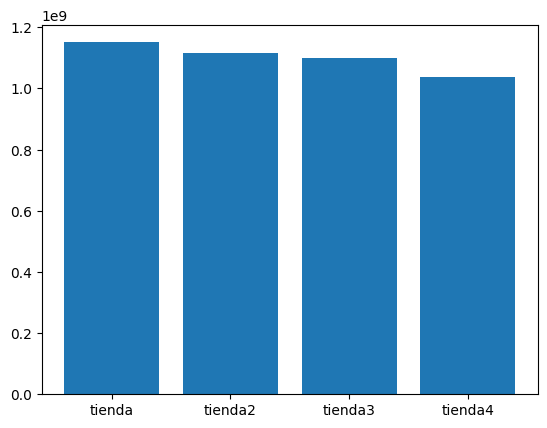

In [12]:
from matplotlib import pyplot as plt
plt.bar(x=ingreso_por_tienda.index, height=ingreso_por_tienda.values)
plt.show()

##**Valoración media por tienda**


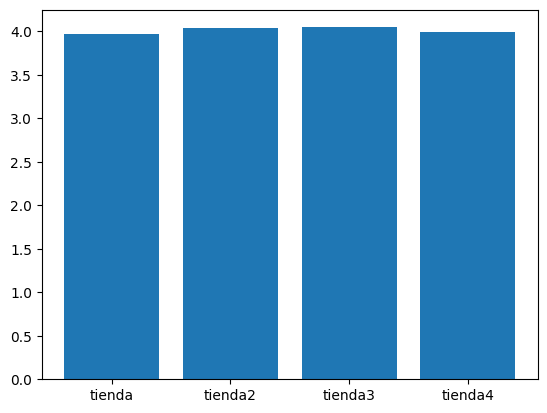

In [13]:
from matplotlib import pyplot as plt
plt.bar(x=Calificacion_prom_por_tienda.index, height=Calificacion_prom_por_tienda.values)
plt.show()